# Useful fact from Linear Algebra

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from math import sin, cos
from scipy.io import loadmat
import matplotlib.cm as cm

1.) What is an orthorgonal matrix? What's the definition and what's the intuition behind it.

2) Given orthorgonal matrix $U$ and vector $v$. How does $||Uv||_2$ compared to $||v||_2$

3) Given an orthorgotal matrix $U$. If we have $Uv = w$, can we find $v$ from $w$?

4) Build an random $3\times5$ matrix and use np.linalg.svd
- the return value are $u, s, v$
- What are the dimension of $u, s, v$
- Compute $u^Tu$, $v^Tv$. What do we call $u,v$?

5) Build $3 \times 5$ pseudo diagonal matrix with diagonal from $s$ call it $\Sigma$


In [ ]:
# sigma = np.zeros((3,5))
# sigma[:3,:3] = np.diag(s)
# sigma

6) Compute $u\times\Sigma\times v$. Compare it with the original matrix.

## Low Rank Approximation

1) Given 2000 pictures for 20 by 30 pixels. What is the dimension of
 - Your data X
 - Basis matrix U (Also what magic property does it have?)
 - Coefficient matrix C

2) Given the matrix $c$ of exactly one picture. How do we get the original picture $x$ back?

3) Given a picture $x$ how do we get the coefficient $c$

In [18]:
u.shape

(3, 3)

4) By cutting off some coefficients what property we try to perseve in $UC$?

5) What should $UC$ optimize?

6) How do we find $U$?

7) Take the hanwritten number image from last time. Find U and find C.

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Fri Dec  3 17:13:58 2004', '__version__': '1.0', '__globals__': [], 'train_patterns': array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       ...,
       [-0.93985581, -0.76438236, -0.99999988, ..., -0.99999988,
        -0.97830033, -0.99999988],
       [-0.99104893, -0.93247736, -0.99999988, ..., -0.99999988,
        -0.99563289, -0.99999988],
       [-0.99916363, -0.99033844, -0.99999988, ..., -0.99999988,
        -0.99974871, -0.99999988]]), 'train_labels': array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1

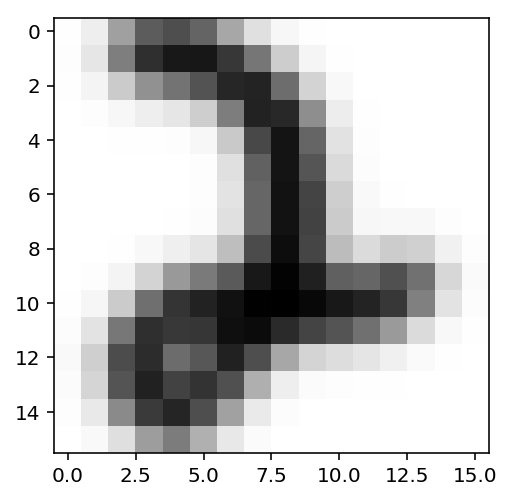

In [56]:
D = loadmat('usps_resampled/usps_resampled.mat')
print(D)
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns
images = D['train_patterns']
print(images.shape)
def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='none', cmap=cm.Greys)
show(images[:,4610])

8) Get one picture. Try plot various picture you cut from varying amout of coefficient.

9) Grab a new picture from test and find C.

# Clustering Problem

1.) What is the difference between clustering problem and classification problem?

2) Consider this data points. We can see that there are clusters. How did we tell that two points belongs to the same cluster? 

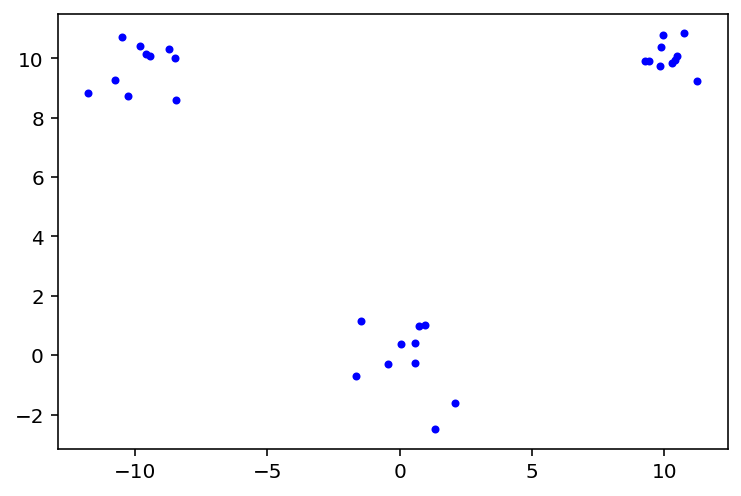

In [5]:
np.random.seed(99887766)
xs = np.random.randn(30,2)
xs[10:20,:] = xs[10:20,:]+[10,10]
xs[20:30,:] = xs[20:30,:]+[-10,10]
plt.plot(xs[:,0], xs[:, 1], '.b')

3) What is a centroid? Given a bunch of centroids how do we decide which centroid a data point belongs to?

4) Summarize the K-mean update rule

5) How should we initialize the seed?
What can go wrong if we seed it with the same centroid ([0,0], [0,0])
What can go wrong if we seed it with ([0,0], [100,100])
How can we avoid these two things?

6) Cluster it.

In [49]:
from dataclasses import dataclass
from typing import List
Centroid = np.ndarray
Data = np.ndarray # (n data x  n_feature)



@dataclass
class KMean:
    centroids: np.ndarray # (n_centroid x n_feature)
        
    def classify(self, data: Data) -> np.ndarray:
        # distance for data to each centroid
        # then pick the nearest one
        ret = []
        for d in data:
            distances = [np.sum((d-c)**2) for c in self.centroids]
            best_centroid = np.argmin(distances)
            ret.append(best_centroid)
        return np.array(ret)
        
    @classmethod
    def make_kmean(self, n_cluster: int, data: Data, n=100) -> 'Kmean':
        random_idx = np.random.choice(len(data), n_cluster, replace=False)
        centroids = data[random_idx, :].copy()
        #print(centroids)
        current_kmean = KMean(centroids=centroids)
        for i in range(n):
            # figuring out the point belonging to each centroid
            # compute the mean for datapoint belonging to each centroid
            # move centroid to the mean.
            cluster_idx = current_kmean.classify(data)
            new_centroids = []
            for i_cluster in range(n_cluster):
                data_for_cluster = data[cluster_idx==i_cluster]
                new_centroid = np.mean(data_for_cluster, axis=0)
                new_centroids.append(new_centroid)
            current_kmean = KMean(np.array(new_centroids))
        return current_kmean
     
    def visualize_with_data(self, data):
        cluster_idx = self.classify(data)
        for i in range(len(self.centroids)):
            plt.plot(data[cluster_idx==i, 0], data[cluster_idx==i, 1], '.')
            plt.plot(self.centroids[i, 0], self.centroids[i, 1], 'x')
        

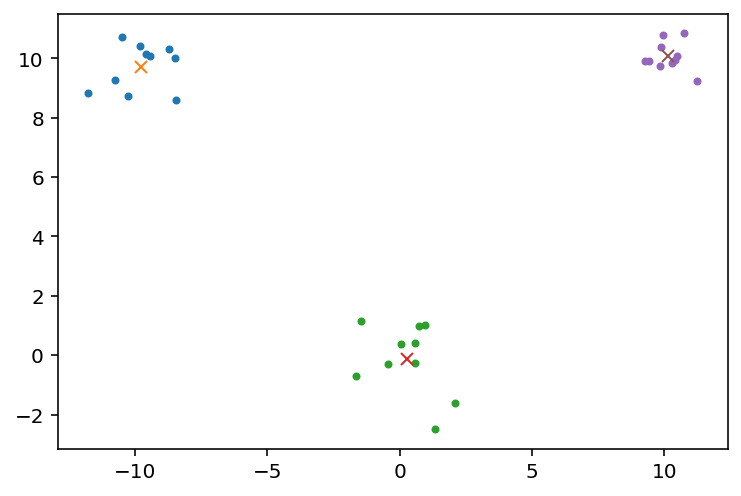

In [50]:
kmean = KMean.make_kmean(3, xs)
kmean.visualize_with_data(xs)

7) Will it work on this data?

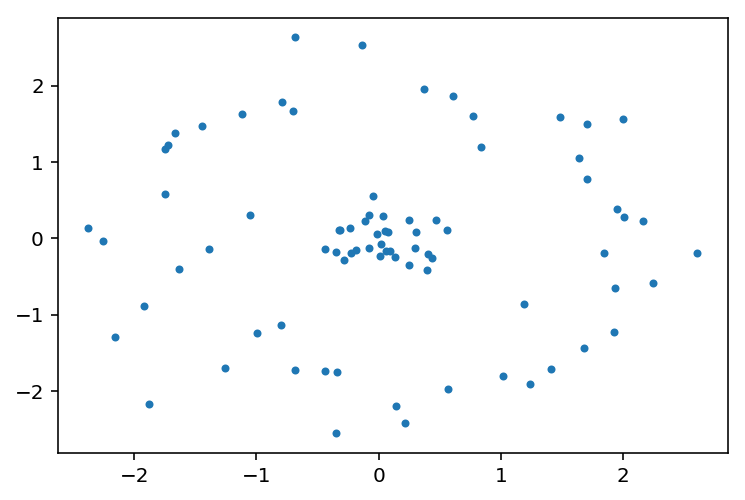

In [51]:
np.random.seed(9999)
ndata = 50
thetas = np.linspace(0,2*math.pi,ndata)
data1 = np.array([
    [2*cos(theta) for theta in thetas],
    [2*sin(theta) for theta in thetas]
])

data1 = data1 + np.random.randn(2, ndata)*0.3

data2 = np.random.randn(2, 30)*0.2

#plt.plot(data1[0], data1[1], '.')
#plt.plot(data2[0], data2[1], '.')

data = np.concatenate((data1, data2), axis=1)
sorted_data = data.copy().T
np.random.shuffle(data.T)


data = data.T
#print data
plt.plot(data[:, 0], data[:, 1],'.')

8) How do we pick the number of cluster?